In [2]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
with open('clean_df_final', 'rb') as fh:  # you need to use 'rb' to read
    df = pickle.load(fh)

In [26]:
df.head()

,Title,Description,Stream
0,RPA Developer / Architect,rpa analyst robotic process automation brand n...,Robotic Process Automation
1,Blue Prism RPA Developer/Analyst,one uks leading investment management companie...,Robotic Process Automation
2,Senior RPA Developer,grade band e salary £41739 £49023 closing date...,Robotic Process Automation
3,RPA Developer,grade band salary £29064 £40698 closing date 1...,Robotic Process Automation
4,Senior RPA Developer,robotic process automation developer abacus ca...,Robotic Process Automation


[Text(0, 0, 'Robotic Process Automation'),
 Text(0, 0, 'Testing'),
 Text(0, 0, 'PMO'),
 Text(0, 0, 'Compliance and Risk'),
 Text(0, 0, 'Information Security Management'),
 Text(0, 0, 'Cyber Security'),
 Text(0, 0, 'Business Analysis'),
 Text(0, 0, 'Business Intelligence'),
 Text(0, 0, 'Cloud Computing'),
 Text(0, 0, 'Development'),
 Text(0, 0, 'IT Service Management')]

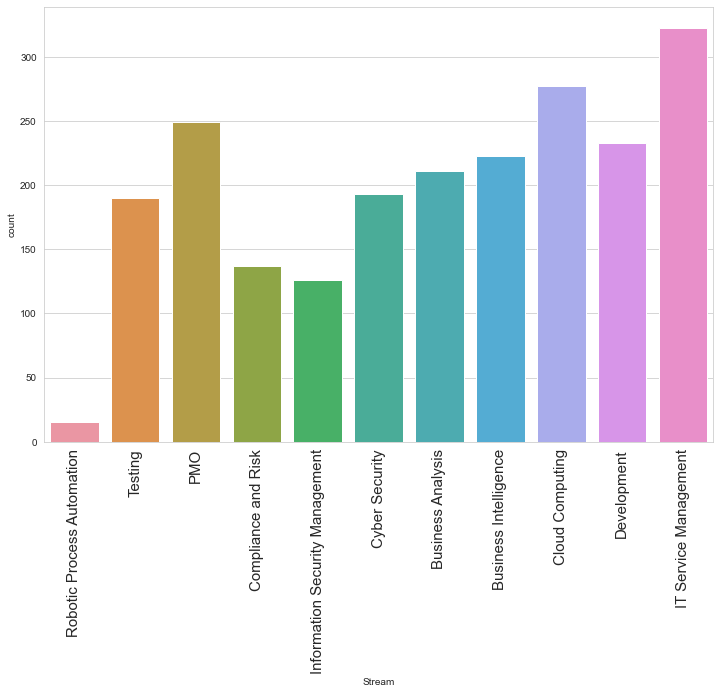

In [27]:
# view how the data is distributed
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
g = sns.countplot(data=df, x='Stream')
g.set_xticklabels(g.get_xticklabels(),rotation=90, fontsize=15)

In [13]:
len(df[df['Stream'] == 'Robotic Process Automation'])

15

## LOGISTIC REGRESSION MODEL >>>>>>

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
X= df['Description'].values
y= df['Stream'].values


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

In [31]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [32]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train) # fit the data to a logisticc regression
score = classifier.score(X_test,y_test)
print("Accuracy: ", score)


Accuracy:  0.8577981651376146


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## A simple MultinomialNB Model

In [164]:
X= df['Description']
y= df['Stream'].values

In [165]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

In [166]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [167]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [168]:
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [169]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = nb.predict(X_test)

In [170]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.5871559633027523


In [ ]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

## Keras Model 1 >> Real python

In [126]:
X= df['Description'].values
y= df['Stream']

In [127]:
# Change to binary
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

y = to_categorical(y)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

In [129]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [131]:
input_dim = X_train.shape[1]  # Number of features

In [132]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(11, activation='softmax'))

In [133]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                186010    
_________________________________________________________________
dense_7 (Dense)              (None, 11)                121       
Total params: 186,131
Trainable params: 186,131
Non-trainable params: 0
_________________________________________________________________


In [134]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=8)

In [135]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9921
Testing Accuracy:  0.7661


In [136]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [137]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


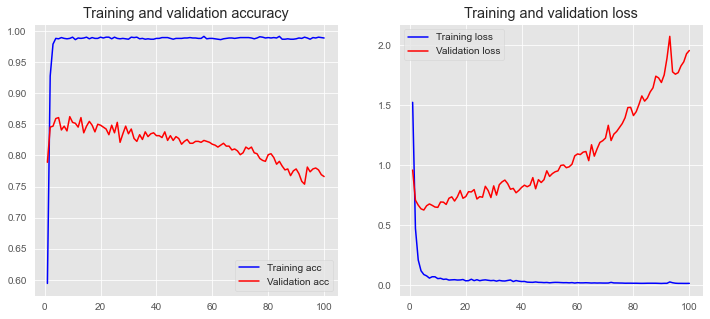

In [138]:
plot_history(history)

## LSTM embedded layer

In [144]:
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [154]:
vocab_size = 5000 # make the top list of words (common words)
embedding_dim = 32
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # OOV = Out of Vocabulary
training_portion = .6

In [155]:
X= df['Description']
y= df['Stream']

In [156]:
X= X.tolist()
y= y.tolist()

In [157]:
# Change to binary
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = to_categorical(y)

In [158]:
train_size = int(len(X) * training_portion)

train_X = X[0: train_size]
train_y = y[0: train_size]

validation_X = X[train_size:]
validation_y = y[train_size:]

In [159]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_X)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_X)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_sequences = (tokenizer.texts_to_sequences(validation_X))
validation_padded = (pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type))

In [160]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(11, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_9 (Dense)              (None, 11)                715       
Total params: 177,355
Trainable params: 177,355
Non-trainable params: 0
_________________________________________________________________


In [161]:
opt = Adam(lr=0.001, decay=1e-6)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

In [162]:
num_epochs = 50
model.fit(train_padded, train_y, epochs=num_epochs, validation_data=(validation_padded, validation_y), verbose=2)

Epoch 1/50
41/41 - 4s - loss: 2.2445 - accuracy: 0.1593 - val_loss: 4.1160 - val_accuracy: 0.0000e+00
Epoch 2/50
41/41 - 4s - loss: 1.9684 - accuracy: 0.2243 - val_loss: 5.2432 - val_accuracy: 0.0000e+00
Epoch 3/50
41/41 - 4s - loss: 1.8153 - accuracy: 0.3070 - val_loss: 5.7095 - val_accuracy: 0.0367
Epoch 4/50
41/41 - 4s - loss: 1.5017 - accuracy: 0.4946 - val_loss: 6.2822 - val_accuracy: 0.0046
Epoch 5/50
41/41 - 5s - loss: 1.4831 - accuracy: 0.4747 - val_loss: 4.6174 - val_accuracy: 0.0184
Epoch 6/50
41/41 - 7s - loss: 1.2231 - accuracy: 0.5995 - val_loss: 6.2975 - val_accuracy: 0.0333
Epoch 7/50
41/41 - 6s - loss: 0.9608 - accuracy: 0.7021 - val_loss: 5.3991 - val_accuracy: 0.0379
Epoch 8/50
41/41 - 5s - loss: 0.7630 - accuracy: 0.7282 - val_loss: 6.8970 - val_accuracy: 0.0321
Epoch 9/50
41/41 - 5s - loss: 0.7352 - accuracy: 0.7259 - val_loss: 6.7763 - val_accuracy: 0.0103
Epoch 10/50
41/41 - 5s - loss: 0.5987 - accuracy: 0.7933 - val_loss: 6.8194 - val_accuracy: 0.0299
Epoch 11/50

KeyboardInterrupt: 

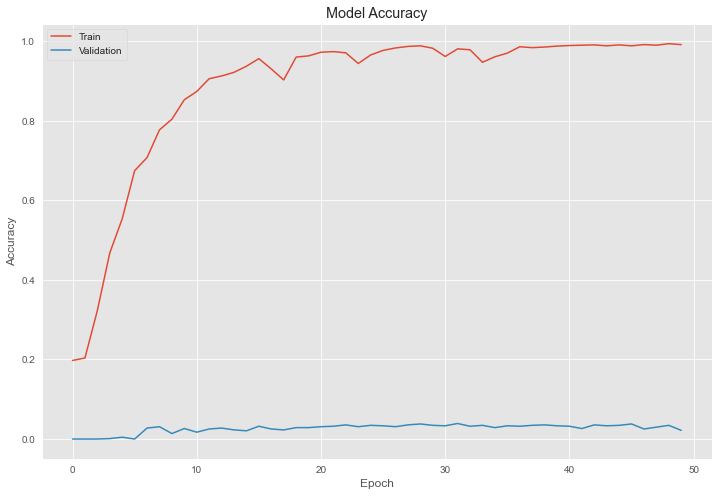

In [124]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(12,8))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

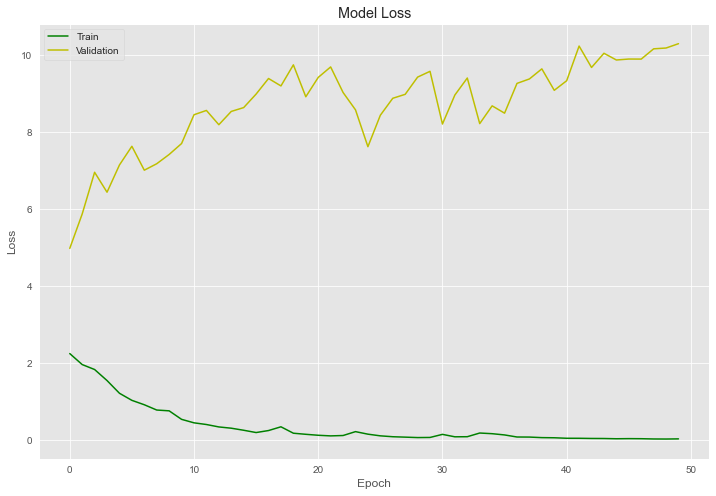

In [125]:
plt.figure(figsize=(12,8))
plt.plot(model.history.history['loss'], 'g' )
plt.plot(model.history.history['val_loss'], 'y')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#PREDICTION
# Making incorrect prediciton

In [140]:
[X[50]]

['brand new contract exciting organisation fintech industry looking software development engineer test work innovative platform alongside java engineers functional programmers work part brand new testing team within established successful organisation making game-changing discoveries technology experience following tools required position worked developer testsdet within fast paced highly scalable environment development experience java kotlin c++ also bonus confident testing tools cucumber selenium web driver jmeter gatling long-term project one progressive organisations central london looking next sdet position youll working highly technical capacity alongside experienced engineers please apply details please note terminology advert intended discriminate grounds age confirm gladly accept applications individuals age role linuxrecruit leading open source specialist provides services agency employment business']

In [143]:
txt = [X[0]]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)

ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:885 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 18600 but received input with shape [None, 200]


In [ ]:
# Drop RPA because of lack of data check how the model performs
# Before lets have a look at precision